#### MetaData - Prepared manually by taking the Fitness -https://royalsocietypublishing.org/doi/10.1098/rspb.2015.2292 & the allele count data and sequencing data - https://github.com/benjaminhgood/LTEE-metagenomic.

##### import libary

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, fisher_exact
import utility, importlib
from scipy.stats import spearmanr
pd.set_option('mode.chained_assignment', None)

#### Read Fitness data from metadata

In [2]:
df_Fitness2_experimental = pd.read_excel("data_fig2_fig3/MetaData_ecoli_final.xlsx", sheet_name="Fitness2_experimental")
df_Fitness2_experimental = df_Fitness2_experimental.rename(columns={'label ': 'label'})
df_Fitness2_experimental.head()

,Generation,Red.Pop,Fitness,Mutator.Ever,label
0,0,Ara - 1,0.910700,Yes,m1
1,500,Ara - 1,1.112534,Yes,m1
2,1000,Ara - 1,0.998220,Yes,m1
3,1500,Ara - 1,1.203381,Yes,m1
4,2000,Ara - 1,1.262659,Yes,m1


##### Check for duplicate 

In [3]:
df_Fitness2_experimental[df_Fitness2_experimental.duplicated()] # No duplicate row found

,Generation,Red.Pop,Fitness,Mutator.Ever,label


##### Read gain sheet data

In [4]:
df_Gain_calculated = pd.read_excel("data_fig2_fig3/MetaData_ecoli_final.xlsx", sheet_name= "Gain score")
df_Gain_calculated.head()

,Position,Gene,Allele,Ref_allele,Alt_allele,Annotation,label,accumulated_gain
0,63,intergenic,A->C,A,C,noncoding,p6,-10.385914
1,201,thrL,T->G,T,G,missense,p6,-1.750693
2,241,thrL,A->C,A,C,missense,m1,-0.911836
3,309,thrA,T->G,T,G,noncoding,m1,4.009052
4,322,thrA,A->G,A,G,noncoding,p3,1.532477


In [5]:
df_Gain_calculated[df_Gain_calculated.duplicated(subset=['Position', 'Gene',
 'Allele', 'Annotation', 'Ref_allele', 'Alt_allele','label'])]

,Position,Gene,Allele,Ref_allele,Alt_allele,Annotation,label,accumulated_gain


##### Read Allele count and generation data from metasheet

In [6]:
df_Alt_allele_count_all_generation = pd.read_excel("data_fig2_fig3/MetaData_ecoli_final.xlsx", sheet_name= "Mastersheet")
df_Alt_allele_count_all_generation.head()

,CHROM,Position,Gene,Allele,Annotation,AC:0,AC:1000,AC:1500,AC:2000,AC:2500,...,AC:57000,AC:57500,AC:58000,AC:58500,AC:59000,AC:59500,AC:60000,Ref_allele,Alt_allele,label
0,chrI,1554,thrA,C->A,missense,0,1,0,2,1.0,...,0,0,1.0,0.0,1.0,0.0,0.0,C,A,p1
1,chrI,1556,thrA,C->A,synonymous,0,0,0,2,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,C,A,p1
2,chrI,2450,thrA,G->T,synonymous,0,0,0,0,0.0,...,81,41,109.0,129.0,4.0,67.0,8.0,G,T,p1
3,chrI,4274,thrC,C->T,missense,0,0,0,0,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,C,T,p1
4,chrI,6400,yaaA,T->G,missense,0,0,0,0,2.0,...,0,0,0.0,0.0,0.0,0.0,0.0,T,G,p1


##### Check if any duplicated row

In [7]:
df_Alt_allele_count_all_generation[df_Alt_allele_count_all_generation.duplicated(subset=['Position', 'Gene', 'Allele', 'Annotation', 'Ref_allele', 'Alt_allele','label'])]

,CHROM,Position,Gene,Allele,Annotation,AC:0,AC:1000,AC:1500,AC:2000,AC:2500,...,AC:57000,AC:57500,AC:58000,AC:58500,AC:59000,AC:59500,AC:60000,Ref_allele,Alt_allele,label
2028,chrI,450000,ylaB,A->G,missense,0,0,0,0,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,A,G,p3


##### delete duplicate row in df_Alt_allele_count_all_generation dataframe where duplicate indicate when ['CHROM','Position', 'Gene', 'Allele', 'Annotation', 'Ref_allele', 'Alt_allele','label'] are same in mutiple row


In [8]:
df_Alt_allele_count_all_generation.drop_duplicates(subset=['CHROM','Position', 'Gene', 'Allele', 'Annotation', 'Ref_allele', 'Alt_allele','label'], inplace=True)
df_Alt_allele_count_all_generation.reset_index(inplace=True, drop=True)
# df_Alt_allele_count_all_generation

In [9]:
df_Alt_allele_count_all_generation.head()

,CHROM,Position,Gene,Allele,Annotation,AC:0,AC:1000,AC:1500,AC:2000,AC:2500,...,AC:57000,AC:57500,AC:58000,AC:58500,AC:59000,AC:59500,AC:60000,Ref_allele,Alt_allele,label
0,chrI,1554,thrA,C->A,missense,0,1,0,2,1.0,...,0,0,1.0,0.0,1.0,0.0,0.0,C,A,p1
1,chrI,1556,thrA,C->A,synonymous,0,0,0,2,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,C,A,p1
2,chrI,2450,thrA,G->T,synonymous,0,0,0,0,0.0,...,81,41,109.0,129.0,4.0,67.0,8.0,G,T,p1
3,chrI,4274,thrC,C->T,missense,0,0,0,0,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,C,T,p1
4,chrI,6400,yaaA,T->G,missense,0,0,0,0,2.0,...,0,0,0.0,0.0,0.0,0.0,0.0,T,G,p1


##### Read LLR Score

In [10]:
df_esm = pd.read_excel("data_fig2_fig3/LLR.xlsx")
df_esm.head()

,Position,Gene,Allele,Ref_allele,Alt_allele,Annotation,label,Start,End,Strand,...,has_space,WT_aa_made2,comparison2,Mut_aa_made,SNP,seq_id_x,universal_id,seq_id_y,mut_name,esm_score
0,241,thrL,A->C,A,C,missense,m1,190,255,+,...,False,MKRISTTITTTITITTGNGAG,True,MKRISTTITTTITITTGHGAG,N18H,241_thrL,241_thrL_N18H,241_thrL,N18H,-4.279933
1,1615,thrA,T->G,T,G,missense,m1,336,2798,+,...,False,MRVLKFGGTSVANAERFLRVADILESNARQGQVATVLSAPAKITNH...,True,MRVLKFGGTSVANAERFLRVADILESNARQGQVATVLSAPAKITNH...,I427S,1615_thrA,1615_thrA_I427S,1615_thrA,I427S,-11.530375
2,8430,talB,T->G,T,G,missense,m1,8236,9189,+,...,False,MTDKLTSLRQYTTVVADTGDIAAMKLYQPQDATTNPSLILNAAQIP...,True,MTDKLTSLRQYTTVVADTGDIAAMKLYQPQDATTNPSLILNAAQIP...,D65E,8430_talB,8430_talB_D65E,8430_talB,D65E,-5.331029
3,12527,dnaK,A->C,A,C,missense,m1,12161,14077,+,...,False,MGKIIGIDLGTTNSCVAIMDGTTPRVLENAEGDRTTPSIIAYTQDG...,True,MGKIIGIDLGTTNSCVAIMDGTTPRVLENAEGDRTTPSIIAYTQDG...,M123L,12527_dnaK,12527_dnaK_M123L,12527_dnaK,M123L,-4.669276
4,13974,dnaK,A->C,A,C,missense,m1,12161,14077,+,...,False,MGKIIGIDLGTTNSCVAIMDGTTPRVLENAEGDRTTPSIIAYTQDG...,True,MGKIIGIDLGTTNSCVAIMDGTTPRVLENAEGDRTTPSIIAYTQDG...,Q605P,13974_dnaK,13974_dnaK_Q605P,13974_dnaK,Q605P,-7.992450


##### Drop Duplicates if any in df_esm

In [11]:
df_esm_no_duplicates = df_esm[["Position",  "Gene", "label", "esm_score", "Allele"]].drop_duplicates(subset= ["Position",  "Gene", "label", "Allele"], keep='first')
df_esm_no_duplicates.dropna(inplace=True)
df_esm_no_duplicates.reset_index(inplace=True, drop=True)
df_esm_no_duplicates.head()

,Position,Gene,label,esm_score,Allele
0,241,thrL,m1,-4.279933,A->C
1,1615,thrA,m1,-11.530375,T->G
2,8430,talB,m1,-5.331029,T->G
3,12527,dnaK,m1,-4.669276,A->C
4,13974,dnaK,m1,-7.992450,A->C


##### Merge Gain score and LLR score 

In [12]:
df_complete = pd.merge(df_Gain_calculated,df_Alt_allele_count_all_generation, on=['Position','Gene','Allele','Annotation','Ref_allele','Alt_allele','label'], how = "left")
df_complete.head()

,Position,Gene,Allele,Ref_allele,Alt_allele,Annotation,label,accumulated_gain,CHROM,AC:0,...,AC:55500,AC:56000,AC:56500,AC:57000,AC:57500,AC:58000,AC:58500,AC:59000,AC:59500,AC:60000
0,63,intergenic,A->C,A,C,noncoding,p6,-10.385914,chrI,0,...,49,78,45,22,36,39.0,11.0,1.0,1.0,6.0
1,201,thrL,T->G,T,G,missense,p6,-1.750693,chrI,0,...,100,140,93,28,79,62.0,15.0,3.0,0.0,13.0
2,241,thrL,A->C,A,C,missense,m1,-0.911836,chrI,0,...,6,1,2,0,0,0.0,0.0,0.0,0.0,0.0
3,309,thrA,T->G,T,G,noncoding,m1,4.009052,chrI,0,...,0,0,0,0,0,0.0,1.0,2.0,7.0,9.0
4,322,thrA,A->G,A,G,noncoding,p3,1.532477,chrI,0,...,23,24,13,16,26,8.0,30.0,22.0,23.0,0.0


##### Extract the column relavent for current analysis from allele count dataframe (all the generation wise allele count, 'CHROM','Position', 'Gene', 'Allele', 'Annotation', 'Ref_allele', 'Alt_allele','label')


In [13]:
filtered_list = [item for item in df_complete if item.startswith("AC")] ## Fiter the column starting with "AC" which indicate allele count
filtered_list.extend(['CHROM','Position', 'Gene', 'Allele', 'Annotation', 'Ref_allele', 'Alt_allele','label', "accumulated_gain"]) ##Add other relavent information
df_allele_generation = df_complete[filtered_list]
df_allele_generation.head() # Get complete dataframe containing all generation wise allele count and other relavent column

,AC:0,AC:1000,AC:1500,AC:2000,AC:2500,AC:3000,AC:4000,AC:4500,AC:5000,AC:5500,...,AC:60000,CHROM,Position,Gene,Allele,Annotation,Ref_allele,Alt_allele,label,accumulated_gain
0,0,0,0,0,0.0,0,0,0,0,0,...,6.0,chrI,63,intergenic,A->C,noncoding,A,C,p6,-10.385914
1,0,0,0,0,0.0,0,0,0,0,0,...,13.0,chrI,201,thrL,T->G,missense,T,G,p6,-1.750693
2,0,0,0,0,0.0,0,0,0,0,0,...,0.0,chrI,241,thrL,A->C,missense,A,C,m1,-0.911836
3,0,0,0,0,0.0,0,0,0,0,0,...,9.0,chrI,309,thrA,T->G,noncoding,T,G,m1,4.009052
4,0,0,0,0,0.0,0,0,0,0,0,...,0.0,chrI,322,thrA,A->G,noncoding,A,G,p3,1.532477


##### Define mutator and non-mutator population 

In [14]:
mutator_list = ['m1', 'm2', 'm3', 'm4', 'p3', 'p6']
non_mutator_list = ['p1', 'p2', 'p4', 'p5', 'm5', 'm6']

##### Population wise mutation count (fig - 2c)

In [15]:
print("The number of mutation present population wise :")
df_complete["label"].value_counts()

The number of mutation present population wise :


label
p6    11257
p3     5967
m1     4994
m4     4953
m2     3398
m3     3215
p1      957
m5      600
m6      475
p4      420
p5      355
p2      331
Name: count, dtype: int64

##### Find the generation which have missing value 

In [16]:
nan_columns = df_allele_generation.columns[df_allele_generation.isna().any()]
df_with_nan = df_allele_generation[nan_columns]
nan_counts = df_allele_generation.isna().sum()
nan_counts = nan_counts[nan_counts > 0]
print("\n Number of NaN values in each column:")
print(nan_counts)


 Number of NaN values in each column:
AC:2500      355
AC:15000    4953
AC:46500     331
AC:58000    3753
AC:58500     355
AC:59000     355
AC:59500     355
AC:60000     355
dtype: int64


##### Drop the generation having nan values

In [17]:
df_allele_generation.drop(nan_counts.index.tolist(), axis = 1, inplace=True)
df_allele_generation.reset_index(inplace=True, drop = True)
df_allele_generation.head()

,AC:0,AC:1000,AC:1500,AC:2000,AC:3000,AC:4000,AC:4500,AC:5000,AC:5500,AC:6000,...,AC:57500,CHROM,Position,Gene,Allele,Annotation,Ref_allele,Alt_allele,label,accumulated_gain
0,0,0,0,0,0,0,0,0,0,0,...,36,chrI,63,intergenic,A->C,noncoding,A,C,p6,-10.385914
1,0,0,0,0,0,0,0,0,0,0,...,79,chrI,201,thrL,T->G,missense,T,G,p6,-1.750693
2,0,0,0,0,0,0,0,0,0,0,...,0,chrI,241,thrL,A->C,missense,A,C,m1,-0.911836
3,0,0,0,0,0,0,0,0,0,0,...,0,chrI,309,thrA,T->G,noncoding,T,G,m1,4.009052
4,0,0,0,0,0,0,0,0,0,0,...,26,chrI,322,thrA,A->G,noncoding,A,G,p3,1.532477


##### Create dataset having all mutation info in proper form for easy calculation
##### Make a dataframe having column ['label', 'CHROM', 'Position', 'Gene', 'Allele', 'Annotation', 'generation', 'allele count', 'generation_number']

In [18]:
data_all_copy = df_allele_generation.copy()
all_mutation = pd.DataFrame() # The all_mutation dataframe contain generation and population wise accumulated gain

for i in data_all_copy.columns[:-9]:
    new_df_tmp = pd.DataFrame()
    new_df = data_all_copy[data_all_copy.loc[:, i]!=0]
    new_df_tmp = new_df[["label", 'CHROM', 'Position', 'Gene', 'Allele', 'Annotation']]
    new_df_tmp.loc[:, "generation"] = i
    new_df_tmp.loc[:, "AG"] = new_df.loc[:, "accumulated_gain"]
    new_df_tmp.loc[:, "allele count"] = new_df.loc[:, i]
    all_mutation = pd.concat([all_mutation, new_df_tmp], axis = 0)
    
    
all_mutation.reset_index(inplace=True, drop=True)
all_mutation['generation_number'] = all_mutation['generation'].str.extract(r'(\d+)').astype(int)
for i in range(all_mutation.shape[0]):
    
    if all_mutation.loc[i, "label"] in mutator_list:
        all_mutation.loc[i, "mutator"] = "mutator"
    if all_mutation.loc[i, "label"] in non_mutator_list:
        all_mutation.loc[i, "mutator"] = "non mutator"

all_mutation.head()

,label,CHROM,Position,Gene,Allele,Annotation,generation,AG,allele count,generation_number,mutator
0,m6,chrI,1457,thrA,G->A,missense,AC:0,-8.160701,1,0,non mutator
1,m2,chrI,2098,thrA,A->G,missense,AC:0,0.007780,1,0,mutator
2,m2,chrI,2942,thrB,A->G,missense,AC:0,-4.953477,1,0,mutator
3,m4,chrI,5437,yaaX,A->G,missense,AC:0,-10.279634,1,0,mutator
4,m5,chrI,7129,yaaJ,A->C,missense,AC:0,2.182288,2,0,non mutator


##### Remove white spaces from columns

In [19]:
df_esm_no_duplicates["Gene"] = df_esm_no_duplicates["Gene"].str.strip()
all_mutation["Gene"] = all_mutation["Gene"].str.strip()
df_esm_no_duplicates["Allele"] = df_esm_no_duplicates["Allele"].str.strip()
all_mutation["Allele"] = all_mutation["Allele"].str.strip()

##### Merge LLR score with Allele count

In [20]:
all_mutation_with_esm_1b_score = pd.merge(all_mutation, df_esm_no_duplicates, on = ["label", 'Position', "Gene", 'Allele'], how="left")
all_mutation_with_esm_1b_score_drop_na = all_mutation_with_esm_1b_score.dropna(subset=["esm_score"])    ##### drop the row where esm score is not available
all_mutation_with_esm_1b_score_drop_na.reset_index(inplace=True, drop=True)
all_mutation_with_esm_1b_score_drop_na.head()

,label,CHROM,Position,Gene,Allele,Annotation,generation,AG,allele count,generation_number,mutator,esm_score
0,m6,chrI,1457,thrA,G->A,missense,AC:0,-8.160701,1,0,non mutator,-3.043034
1,m2,chrI,2098,thrA,A->G,missense,AC:0,0.007780,1,0,mutator,-9.017883
2,m2,chrI,2942,thrB,A->G,missense,AC:0,-4.953477,1,0,mutator,-2.160521
3,m4,chrI,5437,yaaX,A->G,missense,AC:0,-10.279634,1,0,mutator,-3.740739
4,m5,chrI,7129,yaaJ,A->C,missense,AC:0,2.182288,2,0,non mutator,-6.933856


##### calculate generation wise median of fitnesss and esm score for overall population, mutator, non mutator 

In [21]:
# all_population_combined_esm_fitness_median = utility.return_combined_fitness_esm_data(df_Fitness2_experimental, all_mutation_with_esm_1b_score_drop_na)

# mutator_population_combined_esm_fitness_median =  utility.return_combined_fitness_esm_data(fitness_dataframe = df_Fitness2_experimental[df_Fitness2_experimental["label"].isin(mutator_list)], 
# esm_dataframe = all_mutation_with_esm_1b_score_drop_na[all_mutation_with_esm_1b_score_drop_na["label"].isin(mutator_list)])

# non_mutator_population_combined_esm_fitness_median =   utility.return_combined_fitness_esm_data(fitness_dataframe = df_Fitness2_experimental[df_Fitness2_experimental["label"].isin(non_mutator_list)], 
# esm_dataframe = all_mutation_with_esm_1b_score_drop_na[all_mutation_with_esm_1b_score_drop_na["label"].isin(non_mutator_list)] )

##### Generation vs fitness for mutator and non mutator category

###### It shows the line plots of the median fitness of mutators (six samples pooled) and non-mutators (six samples pooled) across 50,000 generations (Wiser, Ribeck, and Lenski 2013). Standard deviation of the fitness estimates is depicted by error bars. The composite trapezoidal rule is used for computing Area Under the Curve (AUC) associated with the fitness trajectories. Mutators display a marginally greater AUC in their fitness trajectory compared to non-mutators.

In [22]:
df_mutator = df_Fitness2_experimental[df_Fitness2_experimental.loc[:, "Mutator.Ever"]=="Yes"]
df_non_mutator = df_Fitness2_experimental[df_Fitness2_experimental.loc[:, "Mutator.Ever"]=="No"]
grouped_mutator_fitness = df_mutator.groupby('Generation')['Fitness'].agg(['median', 'std']).reset_index()
grouped_non_mutator_fitness = df_non_mutator.groupby('Generation')['Fitness'].agg(['median', 'std']).reset_index()
grouped_mutator_fitness.columns= ['Generation', "Median fitness", "Std of fitness"]
grouped_non_mutator_fitness.columns= ['Generation', "Median fitness", "Std of fitness"]

print("As per the trapezoidal rule, area under the mutator fitness curve across generation is : ", np.trapz(x = grouped_mutator_fitness["Generation"], y = grouped_mutator_fitness["Median fitness"]))
print("As per the trapezoidal rule, area under the non mutator fitness curve across generation is : ", np.trapz(x = grouped_non_mutator_fitness["Generation"], y = grouped_non_mutator_fitness["Median fitness"]))

As per the trapezoidal rule, area under the mutator fitness curve across generation is :  78356.80526875
As per the trapezoidal rule, area under the non mutator fitness curve across generation is :  75857.231003625


So area under mutator fitness curve >> area under non mutator curve

##### median fitness vs generation graph (fig - 2d)

###### It shows the line plots of the median fitness of mutators (six samples pooled) and non-mutators (six samples pooled) across 50,000 generations (Wiser, Ribeck, and Lenski 2013). Standard deviation of the fitness estimates is depicted by error bars. The composite trapezoidal rule is used for computing Area Under the Curve (AUC) associated with the fitness trajectories. Mutators display a marginally greater AUC in their fitness trajectory compared to non-mutators.

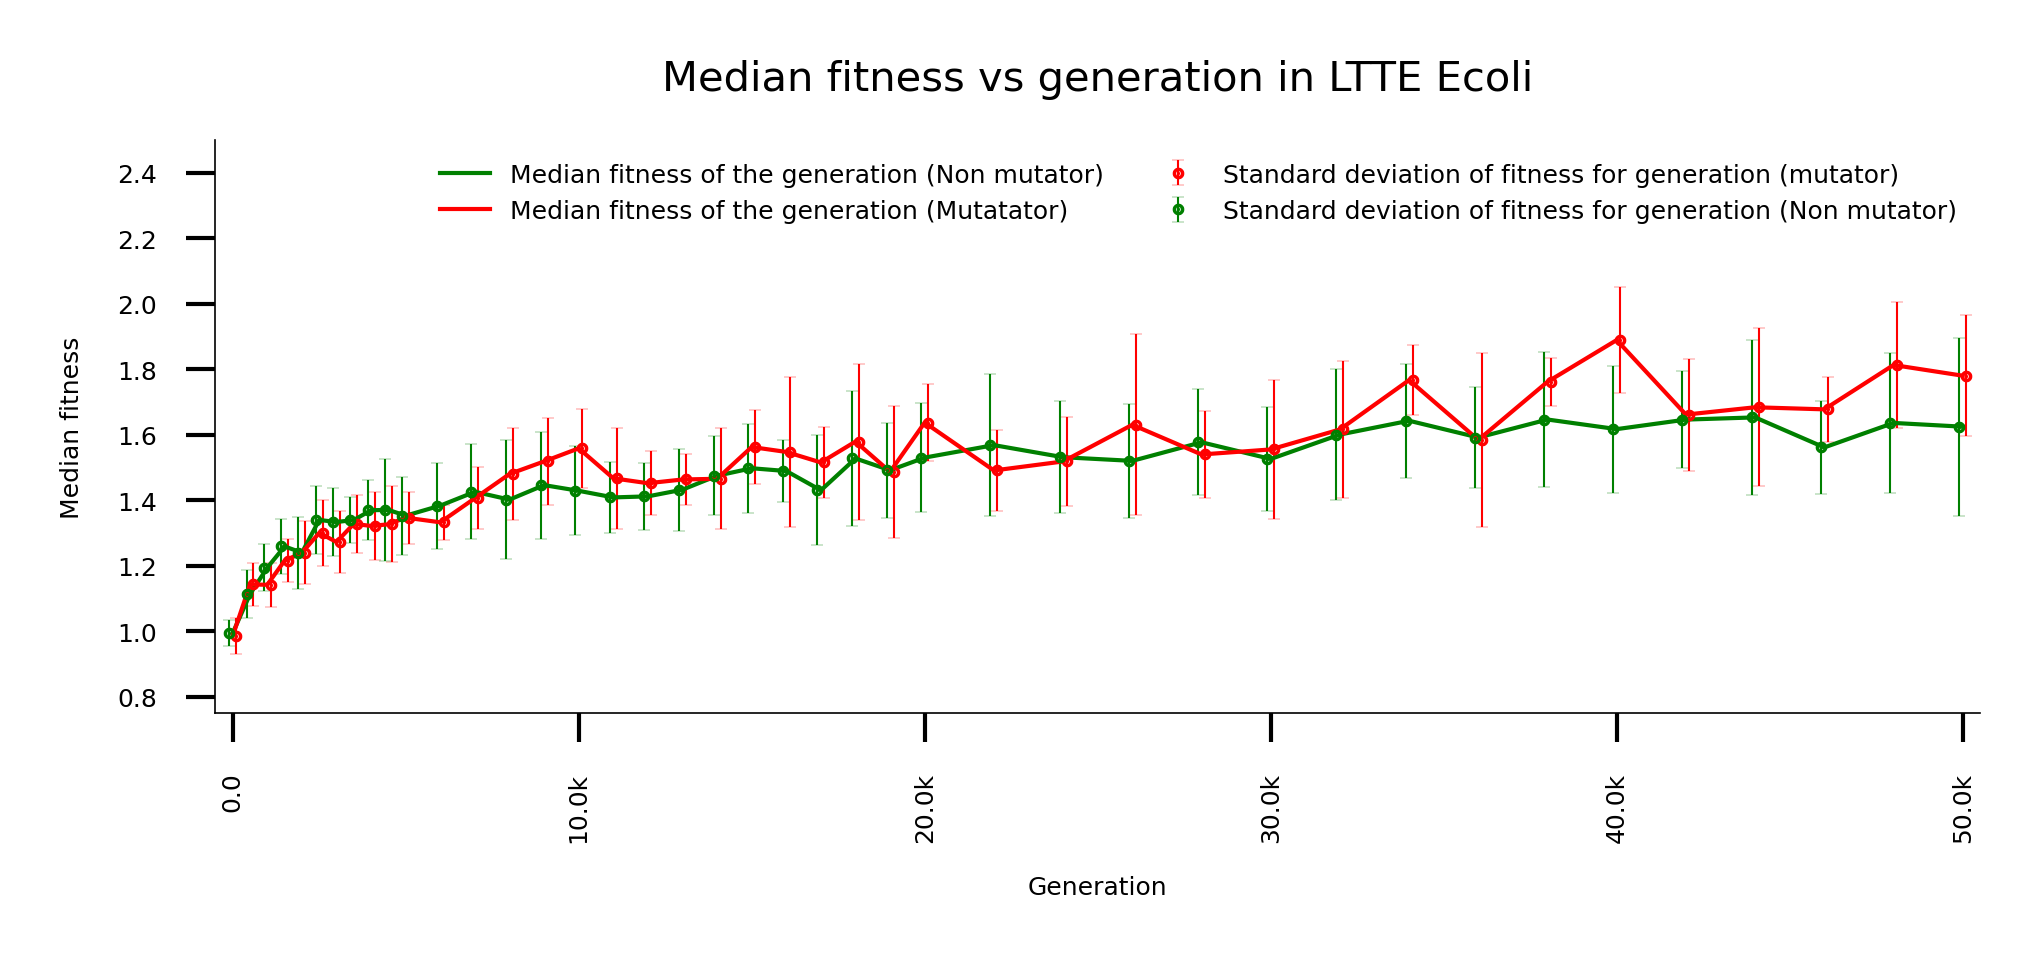

In [23]:
fig, ax = plt.subplots(1, 1 , dpi = 600, figsize = (3.5, 1.7))
from matplotlib.ticker import FuncFormatter

ax.errorbar(x = grouped_mutator_fitness["Generation"]+100, y = grouped_mutator_fitness["Median fitness"], yerr=grouped_mutator_fitness["Std of fitness"], fmt='o', capsize=0.75, label='Standard deviation of fitness for generation (mutator)', capthick=0.05, linewidth=0.25, color = "red", markersize=0.4)
ax.errorbar(x = grouped_non_mutator_fitness["Generation"]-100, y = grouped_non_mutator_fitness["Median fitness"], yerr=grouped_non_mutator_fitness["Std of fitness"], fmt='o', capsize=0.75, label='Standard deviation of fitness for generation (Non mutator)', capthick=0.05, linewidth=0.25, color ="green", markersize=0.4)
ax.plot(grouped_non_mutator_fitness["Generation"], grouped_non_mutator_fitness["Median fitness"], color = "green", label = "Median fitness of the generation (Non mutator)", lw = 0.5)
ax.plot(grouped_mutator_fitness["Generation"], grouped_mutator_fitness["Median fitness"], color ="red", label = "Median fitness of the generation (Mutatator)", lw = 0.5)
ax.legend(ncol=2, fontsize=3, frameon=False)
ax.set_ylim(0.75,2.5)
ax.set_xlim(-500,50500)
ax.set_ylabel("Median fitness")
ax.set_xlabel("Generation")
# Apply the custom tick formatter
formatter = FuncFormatter(utility.format_ticks)
ax.xaxis.set_major_formatter(formatter)
ax = utility.custom_figure_axis(ax, fontsize=3, show_ticks = True)

ax.set_title("Median fitness vs generation in LTTE Ecoli", fontsize=5)
plt.tight_layout()
# plt.savefig("../figure/Generation vs fitness in ecoli custom.pdf", dpi = 600, bbox_inches="tight")

##### Median kGain vs generation line plot with 95% confidence interval ( Upto 2K generation) (fig - 2e)

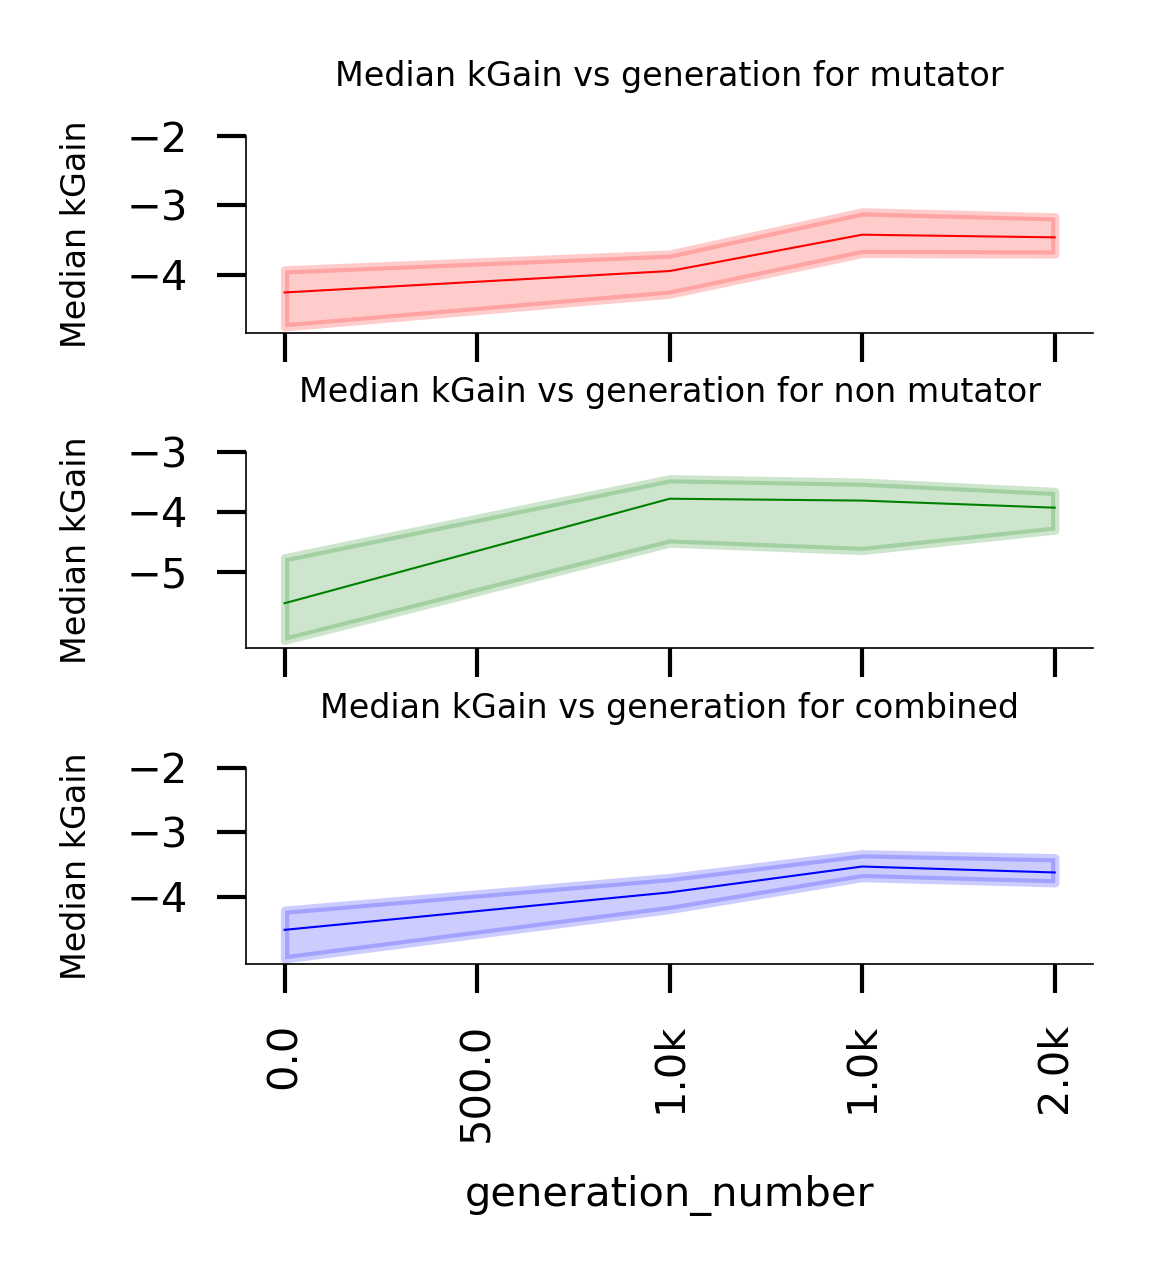

In [24]:
ax = utility.return_mutator_non_mutator_column_name_wise_graph_together(all_mutation[all_mutation["generation_number"]<=2000], mutator_list, non_mutator_list, column_name = "AG", fontsize = 5);

for i in range(3):
    ax[i] = utility.custom_figure_axis(ax[i], fontsize=5, show_ticks = True);
    # ax[i].set_xticks(range(0, 2000, 500));
#     ax[i].set_title(None)
    
ax[0].set_yticks(np.arange(-4, -1.9, 1));
ax[1].set_yticks(np.arange(-5, -2.4, 1));
ax[2].set_yticks(np.arange(-4, -1.9, 1));
ax[0].set_ylabel("Median kGain", fontsize=4);
ax[1].set_ylabel("Median kGain", fontsize=4);
ax[2].set_ylabel("Median kGain", fontsize=4);

ax[0].set_title("Median kGain vs generation for mutator", fontsize=4);
ax[1].set_title("Median kGain vs generation for non mutator", fontsize=4);
ax[2].set_title("Median kGain vs generation for combined", fontsize=4);
#plt.savefig("/home/bernadettem/bernadettenotebook/E.Coli_LTEE/final figure/median ag vs generation in ecoli for 2K.pdf", dpi = 600, bbox_inches="tight")

##### divide the data in two group <=2K and >2K and calculate median kGain gain score vs generation and mutator type wise and obtain one sided p (fig - 2f)

In [25]:
grouped_gen_2K_median_ag = utility.return_generation_grouped_dataframe_with_one_sided_p(all_mutation, column_name = "AG", gen_cut_off = 2000, cut_off_string1 =  "<=2K", cut_off_string2 = ">2K")

The one sided man_whiteney p value within the mutator groups for data points >2K and <=2K generation w.r.t AG score is:  0.0004367866493461707
The one sided man_whiteney p value within the non mutator groups for data points >2K and <=2K w.r.t  AG score is:  0.8599797354349099


Text(0.5, 1.0, 'Median kGain vs mutator type')

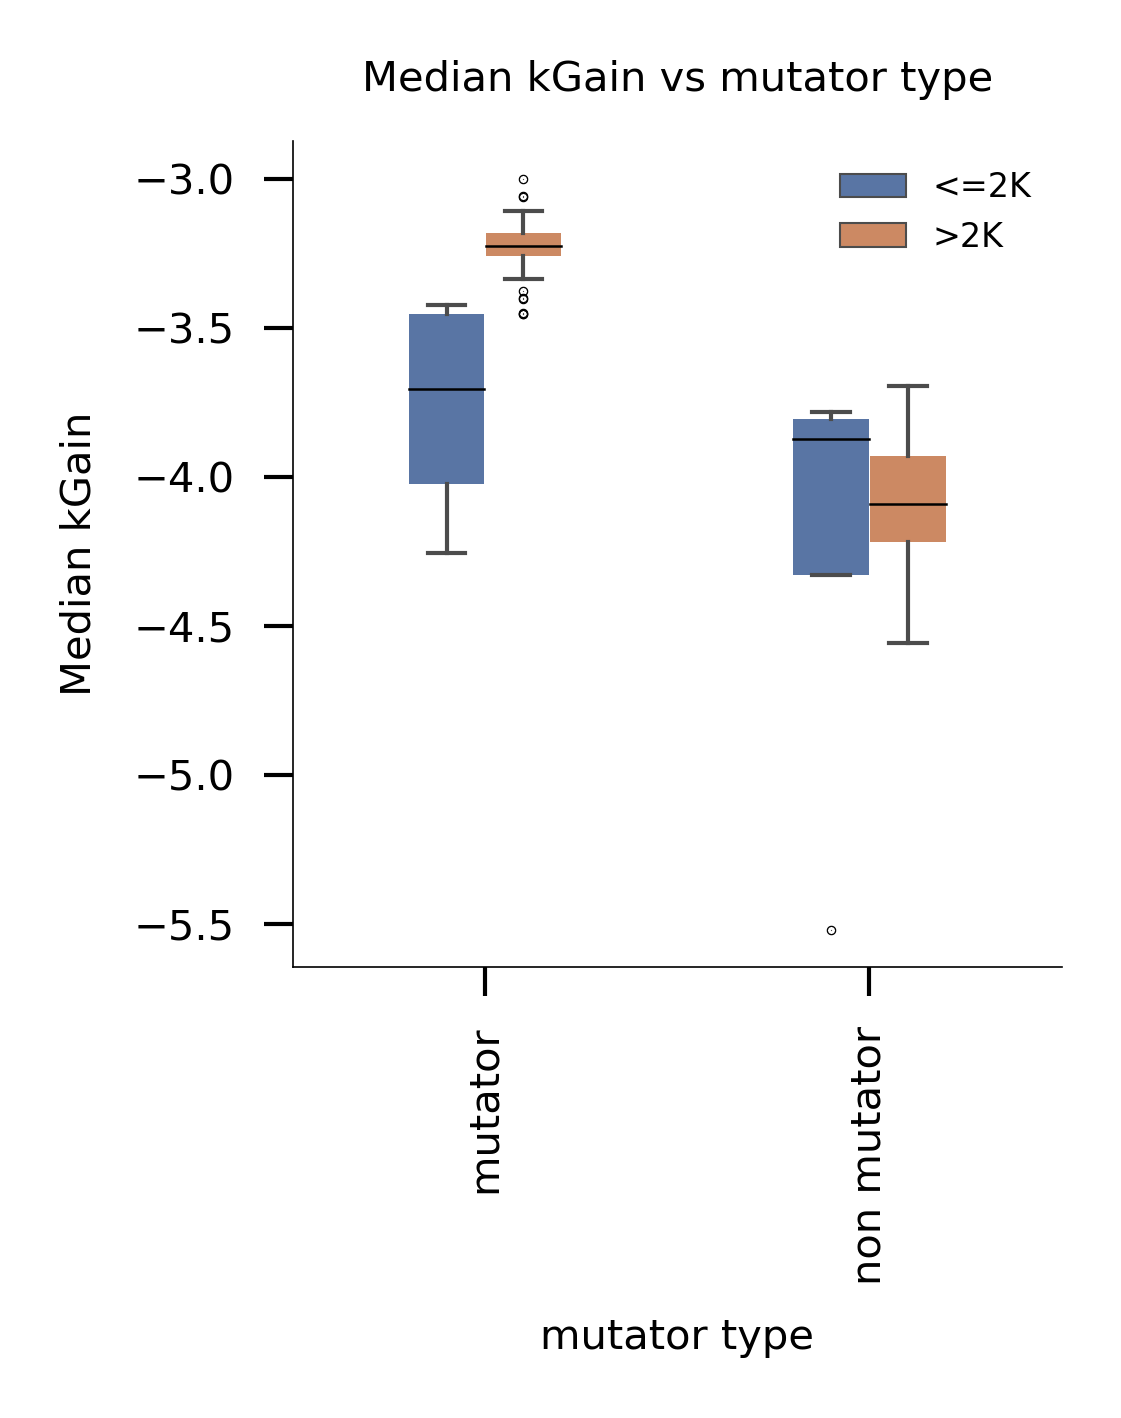

In [26]:
fig, ax = plt.subplots(1, 1 , dpi = 600, figsize = (2.1, 2.1))
sns.set_palette(sns.color_palette('deep'))
sns.boxplot(data=grouped_gen_2K_median_ag, x = "mutator", y = "AG", hue= "group_gen", dodge=20, ax = ax, boxprops=dict(edgecolor="black", linewidth=0),flierprops=dict(marker='o', markeredgecolor='black'), width=0.4,linewidth=0.5, fliersize=0.15, medianprops={"color": "black","linewidth":0.3})
ax.legend(fontsize=4, frameon=False)
plt.tight_layout()
ax = utility.custom_figure_axis(ax, fontsize=5, show_ticks = True)
ax.set_ylabel("Median kGain")
ax.set_xlabel("mutator type")
ax.set_title("Median kGain vs mutator type", fontsize = 5)
#plt.savefig("../figure/Median AG vs type in ecoli with 2k gen as cutoff.pdf", dpi = 600, bbox_inches="tight")

##### Median kGain vs generation line plot with 95% confidence interval (fig - 2g)
###### It shows the line plot of median of accumulated gain vs generation where the the shaaded region indicate 95% confident interval around median for both mutator and non mutator and overall.

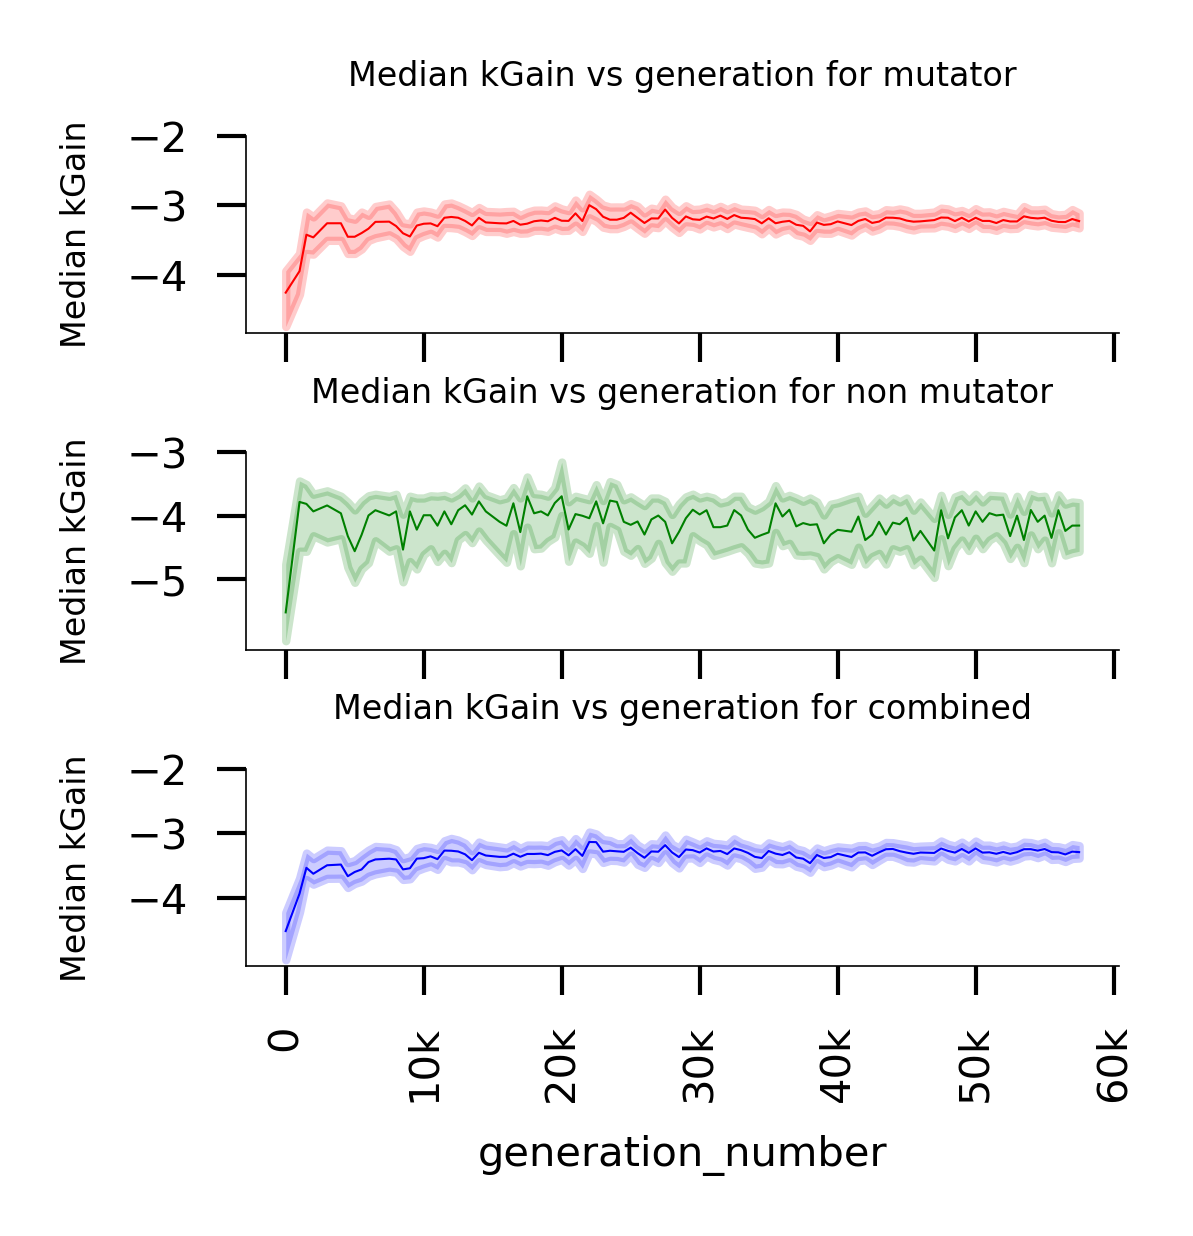

In [27]:
ax = utility.return_mutator_non_mutator_column_name_wise_graph_together(all_mutation, mutator_list, non_mutator_list, column_name = "AG", fontsize = 5);

for i in range(3):
    ax[i] = utility.custom_figure_axis(ax[i], fontsize=5, show_ticks = True);
    ax[i].set_xticks(range(0, 60001, 10000));
#     ax[i].set_title(None)
    
ax[0].set_yticks(np.arange(-4, -1.9, 1));
ax[1].set_yticks(np.arange(-5, -2.4, 1));
ax[2].set_yticks(np.arange(-4, -1.9, 1));
ax[0].set_ylabel("Median kGain", fontsize=4);
ax[1].set_ylabel("Median kGain", fontsize=4);
ax[2].set_ylabel("Median kGain", fontsize=4);

ax[0].set_title("Median kGain vs generation for mutator", fontsize=4);
ax[1].set_title("Median kGain vs generation for non mutator", fontsize=4);
ax[2].set_title("Median kGain vs generation for combined", fontsize=4);
# plt.savefig("../figure/median ag vs generation in ecoli.pdf", dpi = 600, bbox_inches="tight")

##### Median esm score vs generation for all type of population (fig - 2h)
###### It is the line plots showing median esm scores associated with mutations (with a shaded area indicating the 95% confidence interval) for mutators, non-mutators, and their combination (Good et al. 2017). The mutator group consistently shows an upward trend in median LLR scores, while the non-mutator group exhibits a minor increase in median LLR scores towards the end of the trajectory, with substantial intermittent fluctuations. Mutators and non-mutators, when combined, show a steady increase in median LLR scores. Combining mutators and non-mutators reveals a steady rise in median LLR scores, primarily due to the significantly higher mutation frequency in mutators.

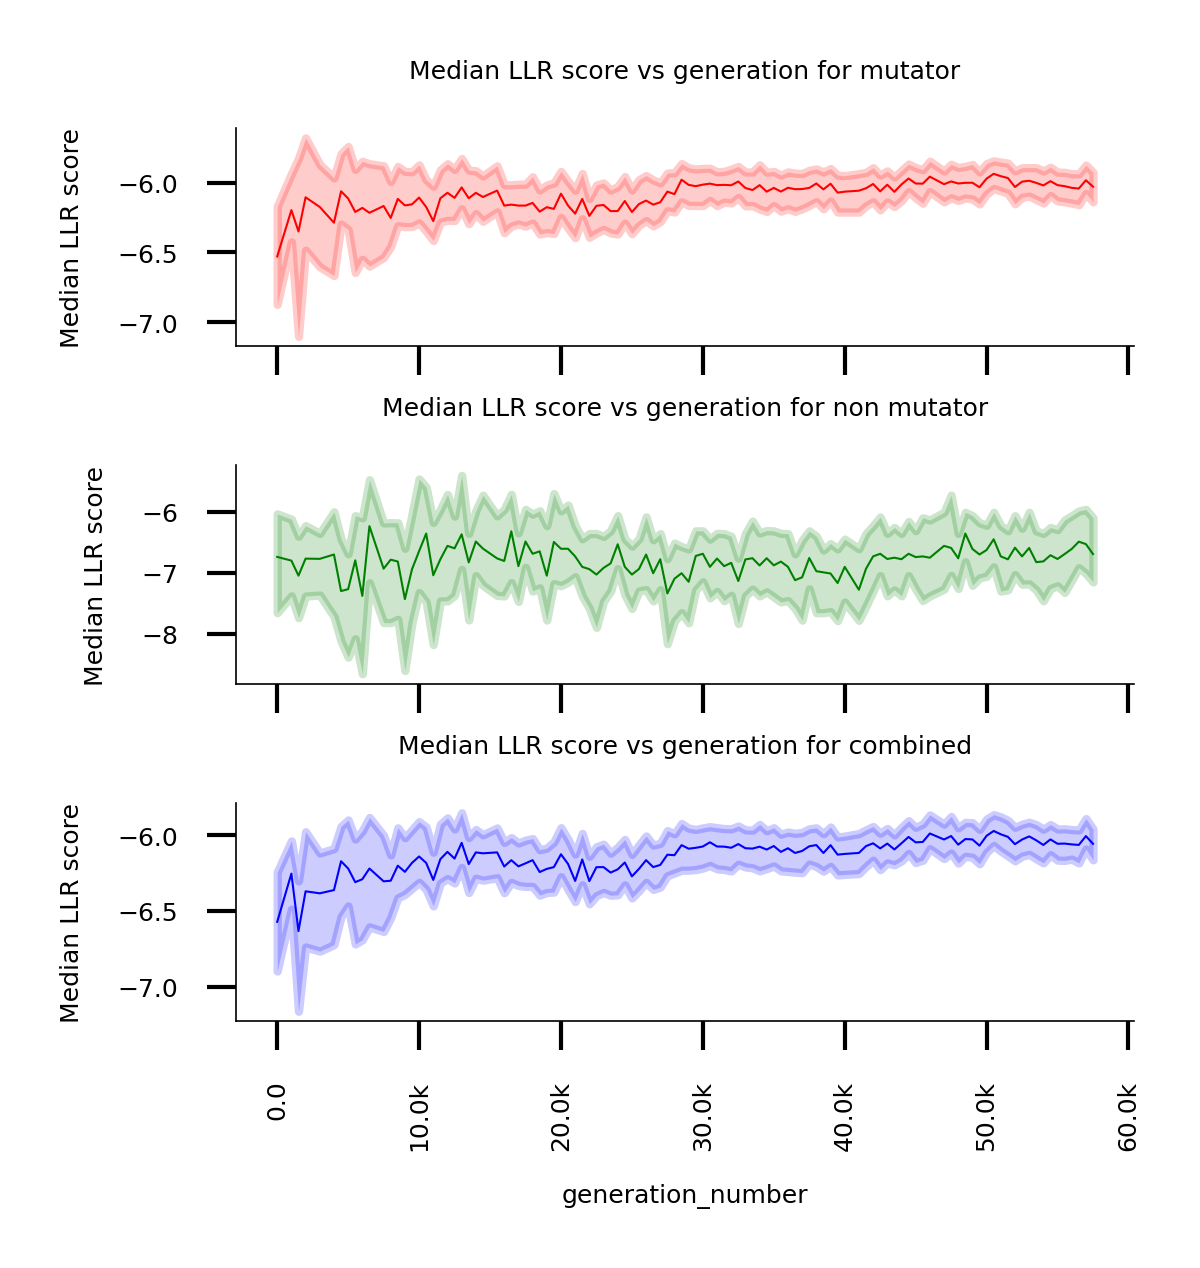

In [28]:
ax = utility.return_mutator_non_mutator_column_name_wise_graph_together(all_mutation_with_esm_1b_score_drop_na, mutator_list, non_mutator_list, column_name = "esm_score", fontsize = 3);
ax[0].set_title("Median LLR score vs generation for mutator", fontsize = 3);
ax[1].set_title("Median LLR score vs generation for non mutator", fontsize = 3);
ax[2].set_title("Median LLR score vs generation for combined", fontsize = 3);
ax[0].set_ylabel("Median LLR score", fontsize = 3);
ax[1].set_ylabel("Median LLR score", fontsize = 3);
ax[2].set_ylabel("Median LLR score", fontsize = 3);
# plt.savefig("../figure/median llr score vs generation.pdf", dpi = 600)